In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as Circle

import numpy as np

import warnings
warnings.filterwarnings("ignore")

Load CSV and drop columns where all the values coincide. For example, the activation used.

In [2]:
df = pd.read_csv("dvip_batch.csv")
df

,num_samples_train,dataset_name,epochs,iterations,vip_layers,bb_alpha,regression_coeffs,lr,split,LOSS_train,RMSE_train,NLL_train,CRPS_train,LOSS,RMSE,NLL,CRPS
0,1,winered,9380,150000,[2],0.0,20,0.001,0,257.402039,0.566855,0.854244,0.316310,252.293411,0.630943,0.949692,0.342804
1,1,concrete,14563,150000,[4],0.0,20,0.001,14,337.131073,3.955514,2.820476,2.210024,376.734589,5.535576,3.119950,2.909893
2,1,concrete,14563,150000,[1],0.0,20,0.010,7,109.715324,7.107774,3.380176,3.940628,102.082184,6.536246,3.309460,3.709862
3,1,winered,9380,150000,[3],0.0,50,0.001,1,226.197815,0.589701,0.892830,0.328269,223.697891,0.668210,1.019451,0.370676
4,1,winered,9380,150000,[2],0.0,50,0.001,0,220.080109,0.581924,0.880134,0.324429,211.073517,0.624116,0.945029,0.339436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,1,boston,29644,150000,[5],0.0,50,0.010,0,297.810913,8.875462,3.602140,4.818063,235.560165,8.564749,3.571259,4.666829
2476,1,energy,32552,250000,[1],0.0,50,0.001,0,66.969650,2.246755,2.232960,1.238920,69.518791,2.290352,2.253166,1.247103
2477,1,energy,19531,150000,[2],0.0,20,0.001,0,327.472137,0.440520,0.703798,0.256694,381.070740,0.599745,0.896288,0.334250
2478,20,winered,9380,150000,[5],0.5,20,0.001,16,1484.007812,0.684588,0.967340,0.376381,1391.091675,0.747644,1.028129,0.404691


Group table by their common parameters and compute mean and std over split

In [3]:
def std(x):
    return np.std(x)/np.sqrt(len(x))
full_df = df.groupby(["dataset_name",  "regression_coeffs", "iterations", "bb_alpha", "lr", "num_samples_train", "vip_layers"]).agg(["mean", std])
full_df


epochs  \
                                                                                          mean   
dataset_name regression_coeffs iterations bb_alpha lr    num_samples_train vip_layers            
boston       20                150000     0.0      0.001 1                 [1]         29644.0   
                                                                           [2]         29644.0   
                                                                           [3]         29644.0   
                                                                           [4]         29644.0   
                                                                           [5]         29644.0   
...                                                                                        ...   
winered      50                250000     0.0      0.001 1                 [1]         15634.0   
                                                                           [2]         15634.0   
                                                                           [3]         15634.0   
                                                                           [4]         15634.0   
                                                                           [5]         15634.0   

                                                                                            \
                                                                                       std   
dataset_name regression_coeffs iterations bb_alpha lr    num_samples_train vip_layers        
boston       20                150000     0.0      0.001 1                 [1]         0.0   
                                                                           [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   
...                                                                                    ...   
winered      50                250000     0.0      0.001 1                 [1]         0.0   
                                                                           [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   

                                                                                      split  \
                                                                                       mean   
dataset_name regression_coeffs iterations bb_alpha lr    num_samples_train vip_layers         
boston       20                150000     0.0      0.001 1                 [1]          9.5   
                                                                           [2]          9.5   
                                                                           [3]          9.5   
                                                                           [4]          9.5   
                                                                           [5]          9.5   
...                                                                                     ...   
winered      50                250000     0.0      0.001 1                 [1]          9.5   
                                                                           [2]          9.5   
                                                                           [3]          9.5   
                                                                           [4]          9.5   
                                                                           [5]          9.5   

                                                                   

# Comparative with other models

In [4]:
query = "regression_coeffs == 20 and lr == 0.001 and iterations == 150000"
vip = full_df.query(query + "and bb_alpha == 0.0 and num_samples_train == 1")
vip


epochs  \
                                                                                          mean   
dataset_name regression_coeffs iterations bb_alpha lr    num_samples_train vip_layers            
boston       20                150000     0.0      0.001 1                 [1]         29644.0   
                                                                           [2]         29644.0   
                                                                           [3]         29644.0   
                                                                           [4]         29644.0   
                                                                           [5]         29644.0   
concrete     20                150000     0.0      0.001 1                 [1]         14563.0   
                                                                           [2]         14563.0   
                                                                           [3]         14563.0   
                                                                           [4]         14563.0   
                                                                           [5]         14563.0   
energy       20                150000     0.0      0.001 1                 [1]         19531.0   
                                                                           [2]         19531.0   
                                                                           [3]         19531.0   
                                                                           [4]         19531.0   
                                                                           [5]         19531.0   
winered      20                150000     0.0      0.001 1                 [1]          9380.0   
                                                                           [2]          9380.0   
                                                                           [3]          9380.0   
                                                                           [4]          9380.0   
                                                                           [5]          9380.0   

                                                                                            \
                                                                                       std   
dataset_name regression_coeffs iterations bb_alpha lr    num_samples_train vip_layers        
boston       20                150000     0.0      0.001 1                 [1]         0.0   
                                                                           [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   
concrete     20                150000     0.0      0.001 1                 [1]         0.0   
                                                                           [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   
energy       20                150000     0.0      0.001 1                 [1]         0.0   
                                                                           [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   
winered      20                150000     0.0      0.001 1                 [1]         0.0   
                                               

In [5]:
vip_05 =  full_df.query(query + " and bb_alpha == 0.5")
vip_05

epochs  \
                                                                                          mean   
dataset_name regression_coeffs iterations bb_alpha lr    num_samples_train vip_layers            
boston       20                150000     0.5      0.001 1                 [1]         29644.0   
                                                         20                [2]         29644.0   
                                                                           [3]         29644.0   
                                                                           [4]         29644.0   
                                                                           [5]         29644.0   
concrete     20                150000     0.5      0.001 1                 [1]         14563.0   
                                                         20                [2]         14563.0   
                                                                           [3]         14563.0   
                                                                           [4]         14563.0   
                                                                           [5]         14563.0   
energy       20                150000     0.5      0.001 1                 [1]         19531.0   
                                                         20                [2]         19531.0   
                                                                           [3]         19531.0   
                                                                           [4]         19531.0   
                                                                           [5]         19531.0   
winered      20                150000     0.5      0.001 1                 [1]          9380.0   
                                                         20                [2]          9380.0   
                                                                           [3]          9380.0   
                                                                           [4]          9380.0   
                                                                           [5]          9380.0   

                                                                                            \
                                                                                       std   
dataset_name regression_coeffs iterations bb_alpha lr    num_samples_train vip_layers        
boston       20                150000     0.5      0.001 1                 [1]         0.0   
                                                         20                [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   
concrete     20                150000     0.5      0.001 1                 [1]         0.0   
                                                         20                [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   
energy       20                150000     0.5      0.001 1                 [1]         0.0   
                                                         20                [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   
winered      20                150000     0.5      0.001 1                 [1]         0.0   
                                               

In [6]:
vip_20 =  full_df.query(query + " and num_samples_train == 20")
vip_20

epochs  \
                                                                                          mean   
dataset_name regression_coeffs iterations bb_alpha lr    num_samples_train vip_layers            
boston       20                150000     0.5      0.001 20                [2]         29644.0   
                                                                           [3]         29644.0   
                                                                           [4]         29644.0   
                                                                           [5]         29644.0   
concrete     20                150000     0.5      0.001 20                [2]         14563.0   
                                                                           [3]         14563.0   
                                                                           [4]         14563.0   
                                                                           [5]         14563.0   
energy       20                150000     0.5      0.001 20                [2]         19531.0   
                                                                           [3]         19531.0   
                                                                           [4]         19531.0   
                                                                           [5]         19531.0   
winered      20                150000     0.5      0.001 20                [2]          9380.0   
                                                                           [3]          9380.0   
                                                                           [4]          9380.0   
                                                                           [5]          9380.0   

                                                                                            \
                                                                                       std   
dataset_name regression_coeffs iterations bb_alpha lr    num_samples_train vip_layers        
boston       20                150000     0.5      0.001 20                [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   
concrete     20                150000     0.5      0.001 20                [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   
energy       20                150000     0.5      0.001 20                [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   
winered      20                150000     0.5      0.001 20                [2]         0.0   
                                                                           [3]         0.0   
                                                                           [4]         0.0   
                                                                           [5]         0.0   

                                                                                      split  \
                                                                                       mean   
dataset_name regression_coeffs iterations bb_alpha lr    num_samples_train vip_layers         
boston       20                150000     0.5      0.001 20                [2]          9.5   
                                                          

In [7]:
doubly = pd.read_csv("doubly-batch.csv")
doubly = doubly.groupby(["dataset", "layers"]).agg(["mean", std]).drop("split", axis = 1)
doubly

iterations       batch            NLL                RMSE  \
                      mean  std   mean  std      mean       std      mean   
dataset  layers                                                             
boston   1        150000.0  0.0  100.0  0.0  2.626956  0.059718  3.488481   
         2        150000.0  0.0  100.0  0.0  2.632418  0.058618  3.517462   
         3        150000.0  0.0  100.0  0.0  2.636399  0.056374  3.537661   
         4        150000.0  0.0  100.0  0.0  2.644758  0.055745  3.556552   
         5        150000.0  0.0  100.0  0.0  2.655651  0.055098  3.574103   
concrete 1        150000.0  0.0  100.0  0.0  3.167927  0.015877  5.843427   
         2        150000.0  0.0  100.0  0.0  3.174945  0.015927  5.876306   
         3        150000.0  0.0  100.0  0.0  3.209063  0.015517  6.019910   
         4        150000.0  0.0  100.0  0.0  3.136244  0.014795  5.534280   
         5        150000.0  0.0  100.0  0.0  3.128830  0.017186  5.521113   
energy   1        150000.0  0.0  100.0  0.0  1.551233  0.018069  1.076332   
         2        150000.0  0.0  100.0  0.0  0.726763  0.014903  0.467630   
         3        150000.0  0.0  100.0  0.0  0.731890  0.018768  0.469160   
         4        150000.0  0.0  100.0  0.0  0.727900  0.015544  0.466139   
         5        150000.0  0.0  100.0  0.0  0.731546  0.016412  0.466774   
wine_red 1        150000.0  0.0  100.0  0.0  0.933053  0.012462  0.616778   
         2        150000.0  0.0  100.0  0.0  0.944507  0.011178  0.622472   
         3        150000.0  0.0  100.0  0.0  0.946053  0.011161  0.622419   
         4        150000.0  0.0  100.0  0.0  0.940261  0.011388  0.619416   
         5        150000.0  0.0  100.0  0.0  0.933177  0.012175  0.615701   

                               CRPS            
                      std      mean       std  
dataset  layers                                
boston   1       0.177300  1.791253  0.056967  
         2       0.187067  1.798345  0.059697  
         3       0.196389  1.799134  0.061956  
         4       0.202040  1.809257  0.064094  
         5       0.204379  1.815612  0.064114  
concrete 1       0.123310  3.201107  0.057087  
         2       0.127967  3.219465  0.058164  
         3       0.127899  3.314451  0.057048  
         4       0.116370  3.056229  0.051696  
         5       0.128517  3.041258  0.057623  
energy   1       0.030371  0.628116  0.015579  
         2       0.012487  0.265443  0.005200  
         3       0.012349  0.266730  0.005410  
         4       0.011210  0.265415  0.004630  
         5       0.012389  0.265960  0.005346  
wine_red 1       0.008478  0.342316  0.004154  
         2       0.007762  0.346119  0.003827  
         3       0.007922  0.346564  0.003921  
         4       0.007942  0.344073  0.003840  
         5       0.008424  0.341939  0.004103

In [8]:
def comparative_plot(model_names, mean_values, std_values, colors, ax):
    """
    Creates a plot where the different models are shown in the "y" axis and mean and std values on the x axis.
    The first model is used to create a vertical dashed line, as a benchmark.
    """
    # Compute mean and std of points 
    mean = np.nanmean(mean_values)
    std = np.nanstd(mean_values)
    # Replace non-existint results (np.nan) with a white point (invisible).
    nan_pos = np.isnan(mean_values)
    c = np.array(colors)
    c[nan_pos] = "white"
    means = np.array(mean_values)
    means[nan_pos] = mean
    
    # Compute points that are far from the mean and meake them invisible
    far = means - mean > 2*std
    far[0] = False
    means[far] = np.mean(means[~far])
    c[far] = "white"
    
    # Scatter points
    ax.scatter(means, model_names, c = c, plotnonfinite = True)
    # Draw std horizontal lines
    ax.hlines(np.array(model_names)[~far], np.array(mean_values - std_values)[~far],np.array(means + std_values)[~far], colors= np.array(colors)[~far])
    # Draw baseline line on first model
    if far[0] == False:
        ax.axvline(mean_values[0], linestyle = "dashed", color = "k")
    
    # Plot an arrow for far points.
    if far.any() != 0:
        x_min, x_max = ax.get_xlim()
        slope = (x_max - x_min)/5
        ax.arrow(x = x_max - slope, y = np.array(model_names)[far][0], 
                 dx = slope, dy =0, color = np.array(colors)[far][0],
                 width = 0.002, head_width=0.3, head_length=slope/3, linewidth=1, length_includes_head = True,
                )
        
def get_dataset(dataset, metric, agg, train_metrics = False):
    if dataset == "winered":
        d_dataset = "wine_red"
    else:
        d_dataset = dataset
    vip_query = vip.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    vip20_query = vip_20.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    vip05_query = vip_05.query("dataset_name == @dataset").xs((metric + "_train" if train_metrics else metric, agg),axis=1).to_frame()
    doubly_query = doubly.query("dataset == @d_dataset").xs((metric, agg),axis=1).to_frame()

    def item(array):
        if array.size == 0:
            return np.nan
        else:
            return array.item()
    
    ret = {r"VIP $\alpha=0$": item(vip_query.query("vip_layers == '[1]'").to_numpy()),
          "DVIP 2": item(vip_query.query("vip_layers == '[2]'").to_numpy()),
          "DVIP 3": item(vip_query.query("vip_layers == '[3]'").to_numpy()),
          "DVIP 4": item(vip_query.query("vip_layers == '[4]'").to_numpy()),
          "DVIP 5": item(vip_query.query("vip_layers == '[5]'").to_numpy()),
          r"VIP $\alpha=0.5$": item(vip05_query.query("vip_layers == '[1]'").to_numpy()),
          r"DVIP 2 $\alpha=0.5$": item(vip20_query.query("vip_layers == '[2]'").to_numpy()),
          r"DVIP 3 $\alpha=0.5$": item(vip20_query.query("vip_layers == '[3]'").to_numpy()),
          r"DVIP 4 $\alpha=0.5$": item(vip20_query.query("vip_layers == '[4]'").to_numpy()),
          r"DVIP 5 $\alpha=0.5$": item(vip20_query.query("vip_layers == '[5]'").to_numpy()),
          "DGP": item(doubly_query.query("layers == 1").to_numpy()),
          "DGP 2": item(doubly_query.query("layers == 2").to_numpy()),
          "DGP 3": item(doubly_query.query("layers == 3").to_numpy()) or np.nan,
          "DGP 4": item(doubly_query.query("layers == 4").to_numpy()) or np.nan,
          "DGP 5": item(doubly_query.query("layers == 5").to_numpy()) or np.nan
    }
    
    return ret

def plot_datasets(dataset_names, model_names, colors, metric, train_metrics = False):
    fig, ax = plt.subplots((len(dataset_names) - 1)//4 + 1, min(len(dataset_names), 4), figsize = (20, 10))
    fig.tight_layout(pad=3.0) # Or equivalently,  "plt.tight_layout()"

    for i in range(len(dataset_names)):
        dataset = dataset_names[i]
        if len(dataset_names) < 4:
            axis = ax[i]
        else:
            axis = ax[i// (len(dataset_names)//2), i%(len(dataset_names)//2)]
        axis.set_title(dataset.capitalize())
        axis.locator_params(axis="x", nbins=4)
        if i % 4 > 0:
            axis.tick_params(left = False)
            axis.set_yticklabels([])
        if i % 4 == min(len(dataset_names), 4) - 1:
            axis.yaxis.tick_right()
            axis.set_yticklabels(model_names)
        
        
        comparative_plot(model_names, 
                         np.array([get_dataset(dataset, metric, "mean", train_metrics).get(model, np.nan) for model in model_names]), 
                         np.array([get_dataset(dataset, metric, "std", train_metrics).get(model, np.nan) for model in model_names]), 
                         [colors[model] for model in model_names], 
                         axis)
        
    handles = [
        Circle.Patch(color='darkblue', label='Single layer models'),
        Circle.Patch(color='teal', label='This work'),
        Circle.Patch(color='darkorange', label='Deep GP models'),
        Circle.Patch(color='orchid', label='Bayesian NN'),
    ]

    if len(dataset_names) < 4:
        ax[len(dataset_names) - 1].legend(loc='upper center', bbox_to_anchor=(-0.6, -0.05),
              fancybox=True, shadow=True, ncol=5, handles = handles)
    else:
        ax[1][1].legend(loc='upper center', bbox_to_anchor=(1.1, -0.15),
              fancybox=True, shadow=True, ncol=5, handles = handles)
        
    plt.savefig("../plots/" + metric + ("_train" if train_metrics else "") + "_" +query + "_complete.pdf", bbox_inches='tight')
        

In [9]:
dataset_names = ["boston", "energy", "concrete", "winered", "power", "naval", "protein", "kin8nm"]
model_names = [r"VIP $\alpha=0$", "DVIP 2", "DVIP 3", "DVIP 4", "DVIP 5",
               r"VIP $\alpha=0.5$", r"DVIP 2 $\alpha=0.5$",r"DVIP 3 $\alpha=0.5$",
               r"DVIP 4 $\alpha=0.5$",r"DVIP 5 $\alpha=0.5$",
               "DGP", "DGP 2", "DGP 3", "DGP 4", "DGP 5"]
colors = {r"VIP $\alpha=0$": "darkblue", 
          "DVIP 2": "teal", 
          "DVIP 3": "teal", 
          "DVIP 4": "teal", 
          "DVIP 5": "teal", 
          r"VIP $\alpha=0.5$": "darkblue", 
          r"DVIP 2 $\alpha=0.5$": "teal", 
          r"DVIP 3 $\alpha=0.5$": "teal", 
          r"DVIP 4 $\alpha=0.5$": "teal", 
          r"DVIP 5 $\alpha=0.5$": "teal", 
          "DGP": "darkblue",
          "DGP 2": "darkorange", 
          "DGP 3": "darkorange",
          "DGP 4": "darkorange",
          "DGP 5": "darkorange"}

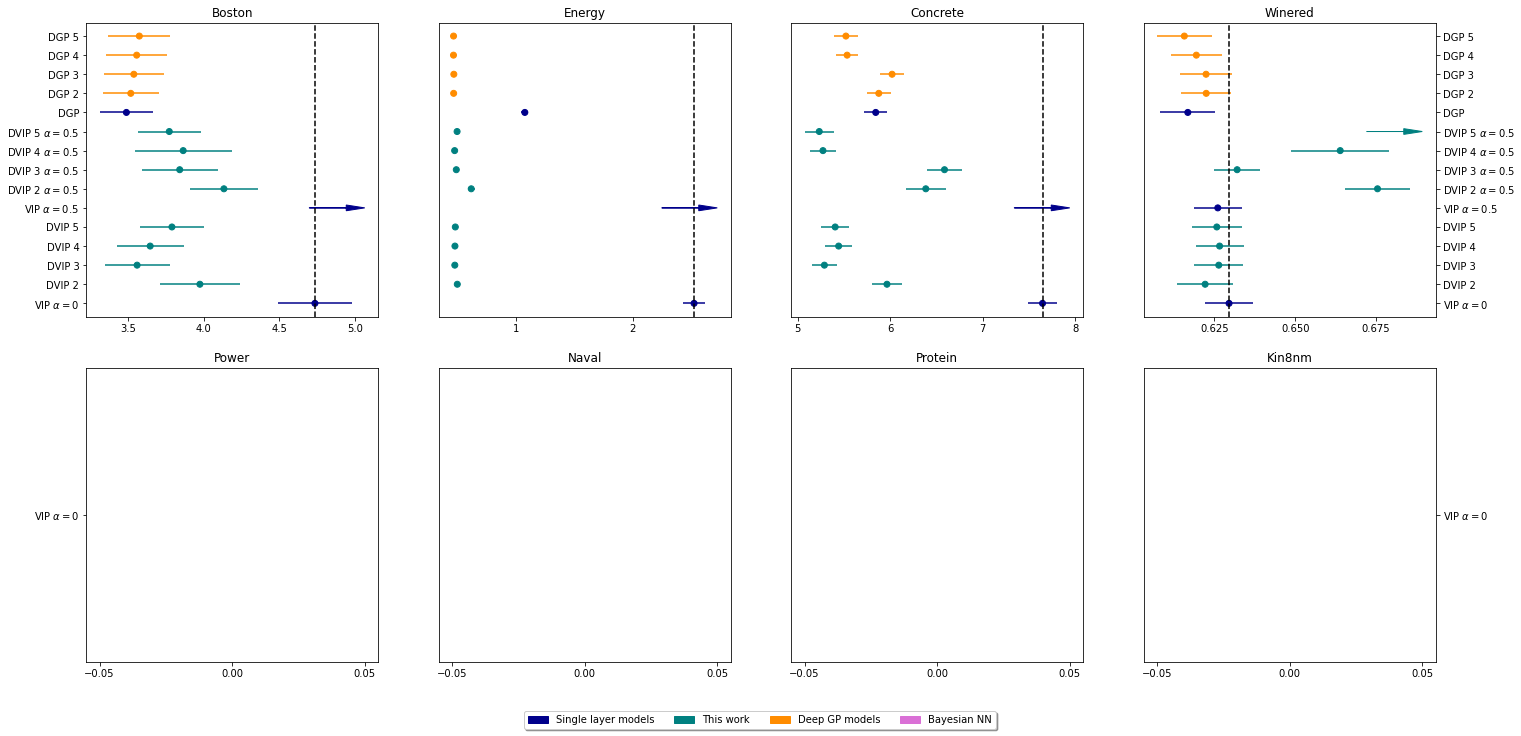

In [10]:
plot_datasets(dataset_names, model_names, colors, "RMSE")

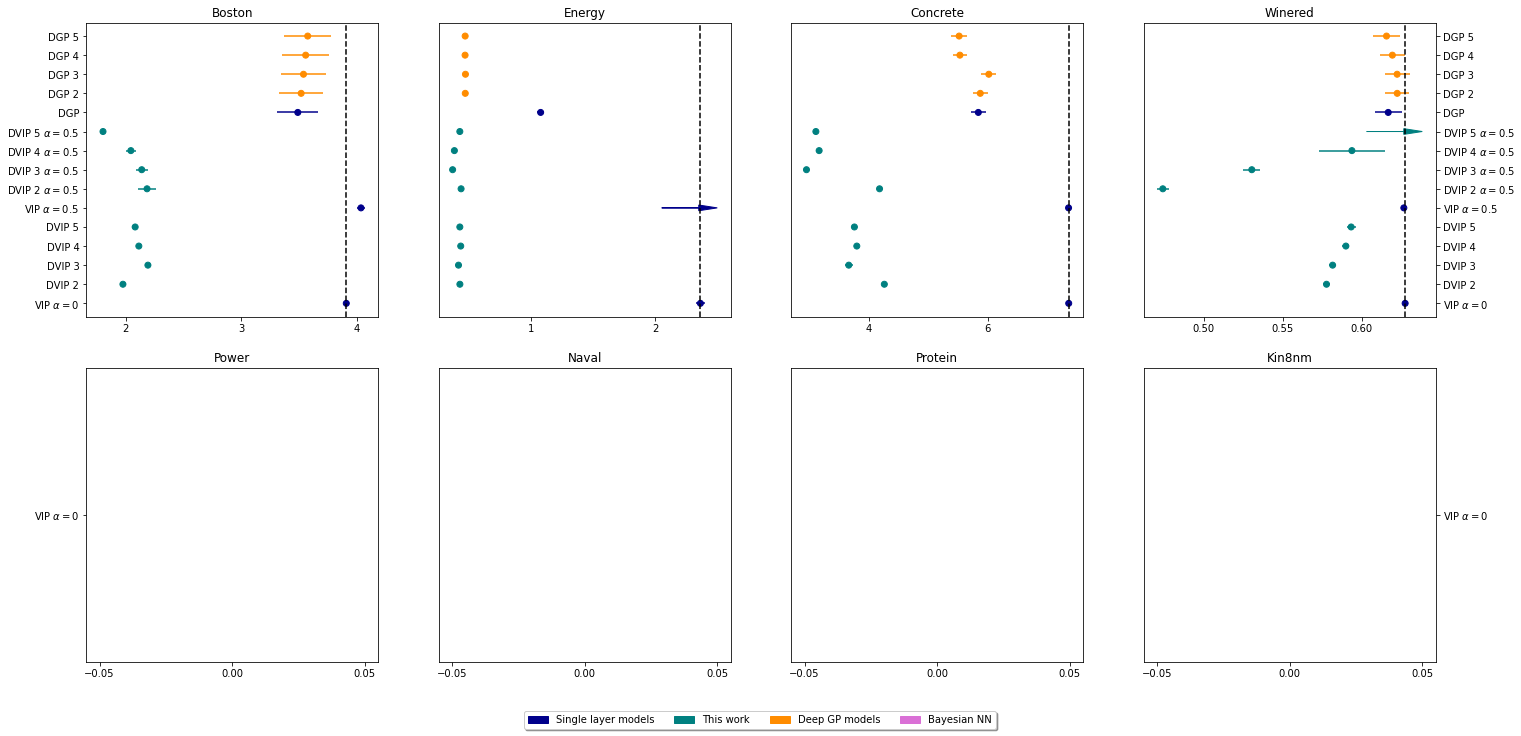

In [11]:
plot_datasets(dataset_names, model_names, colors, "RMSE", train_metrics = True)

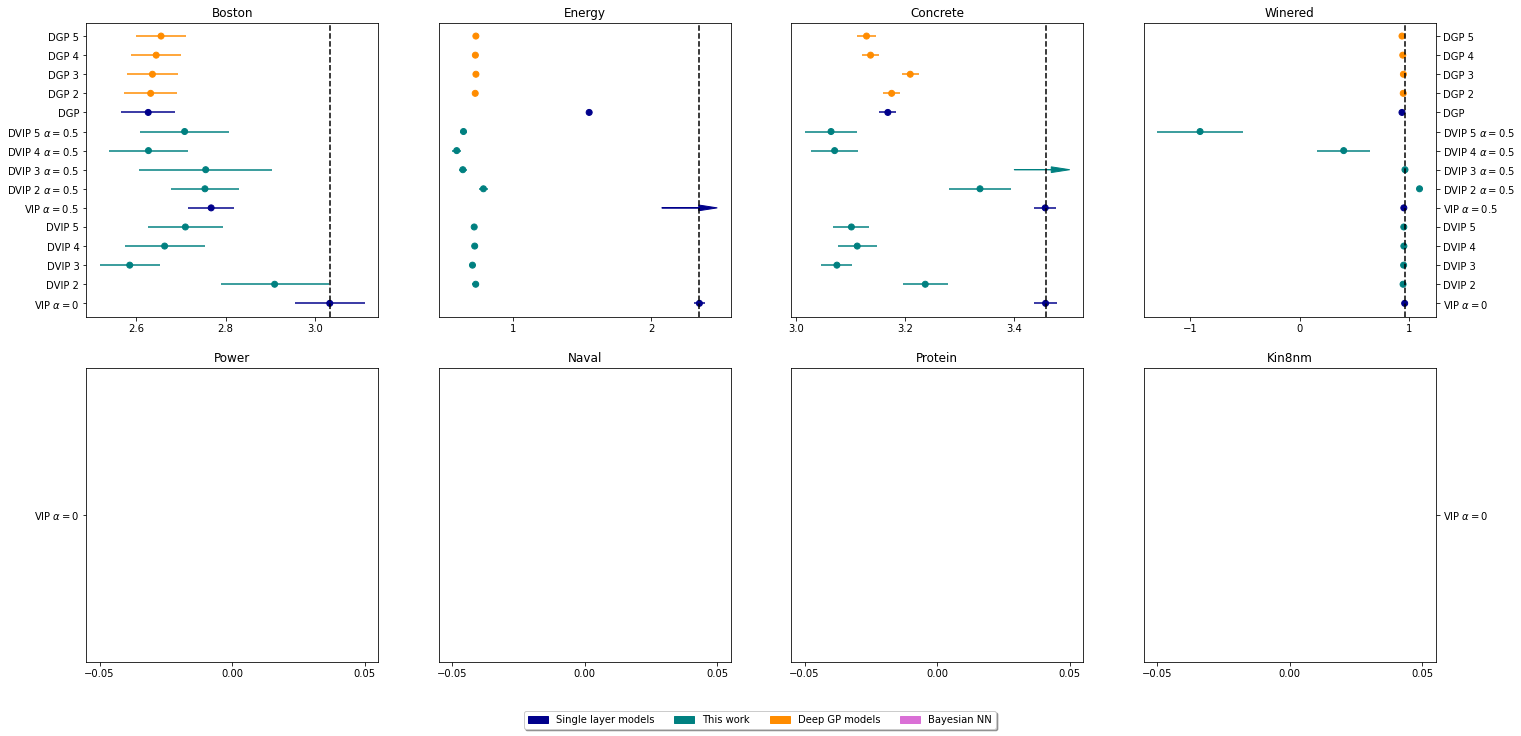

In [12]:
plot_datasets(dataset_names, model_names, colors, "NLL")

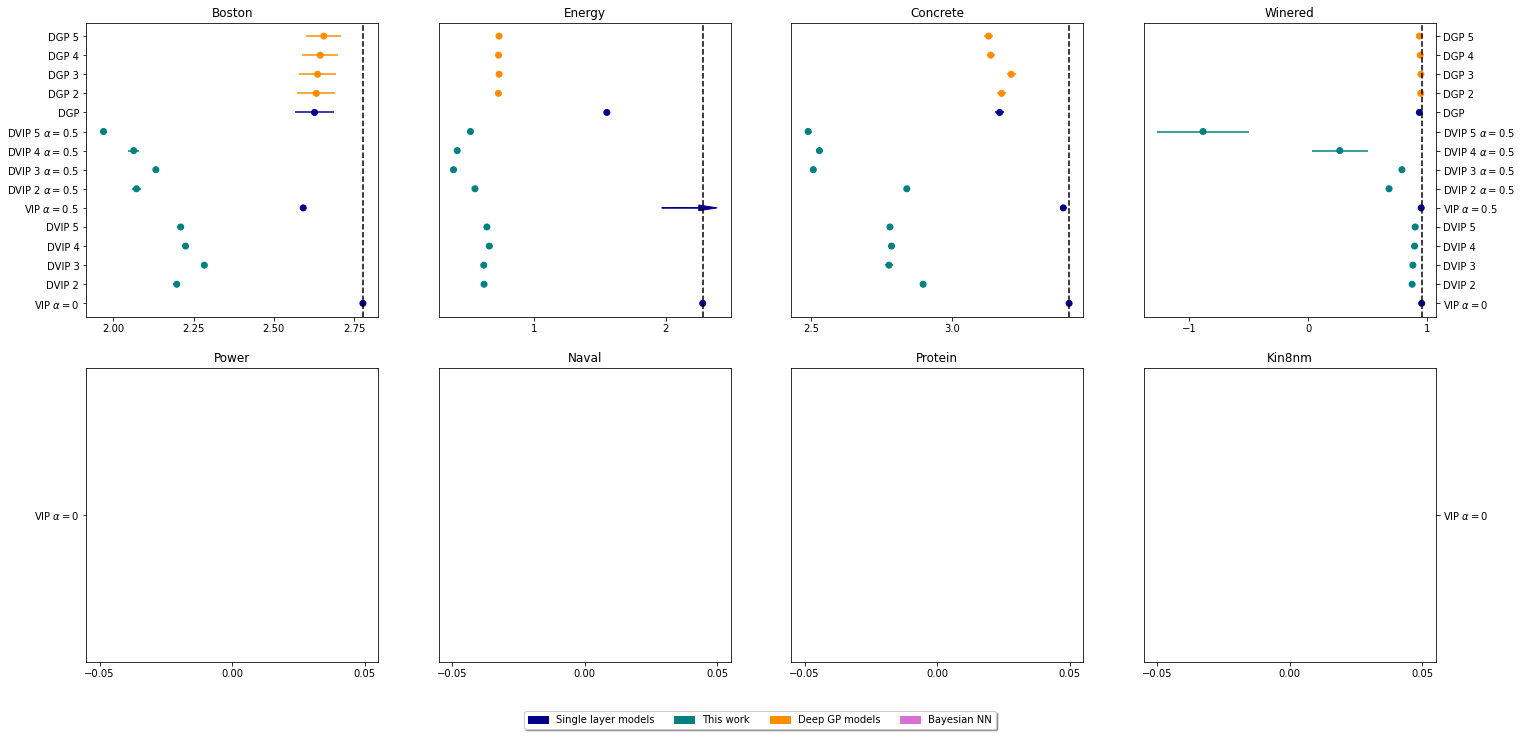

In [13]:
plot_datasets(dataset_names, model_names, colors, "NLL", train_metrics = True)

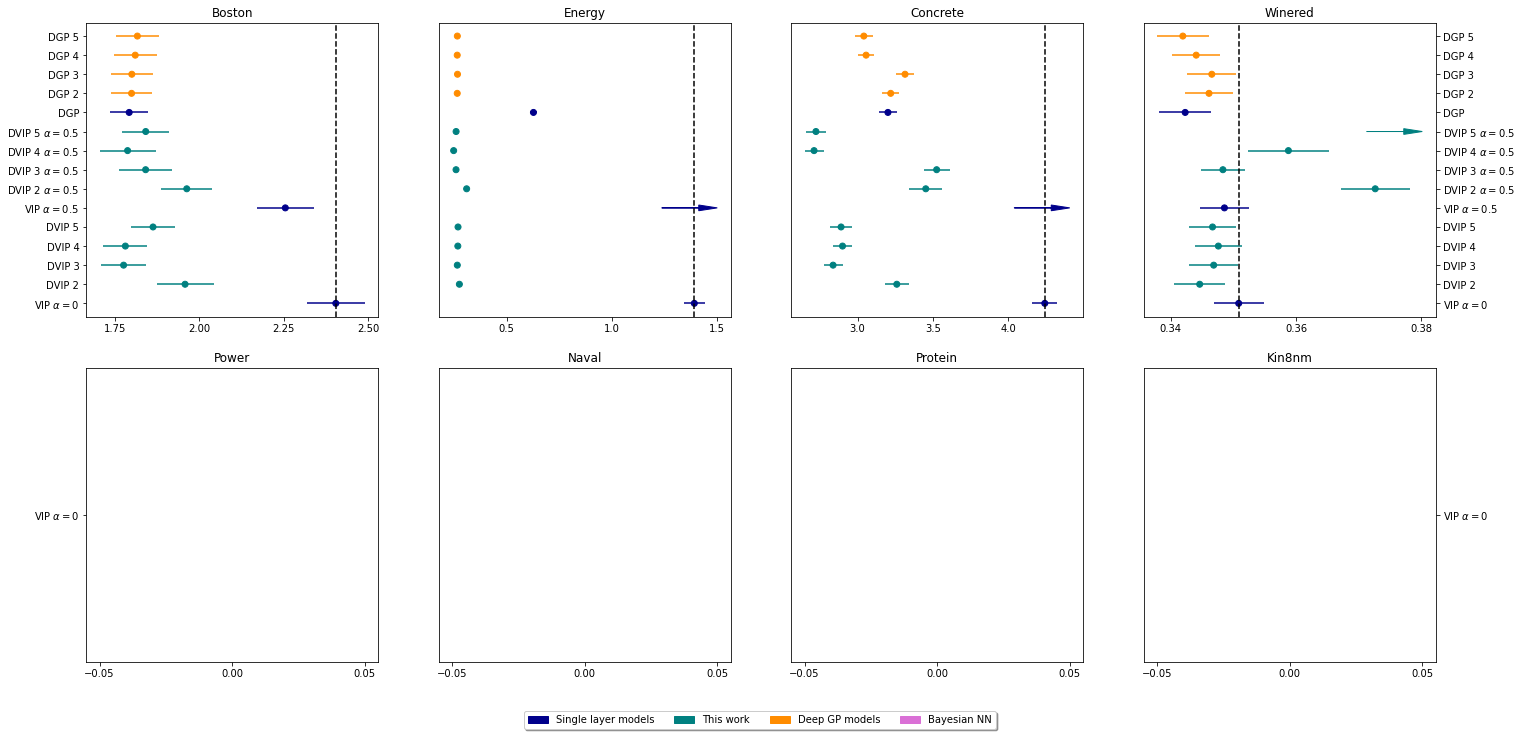

In [14]:
plot_datasets(dataset_names, model_names, colors, "CRPS")

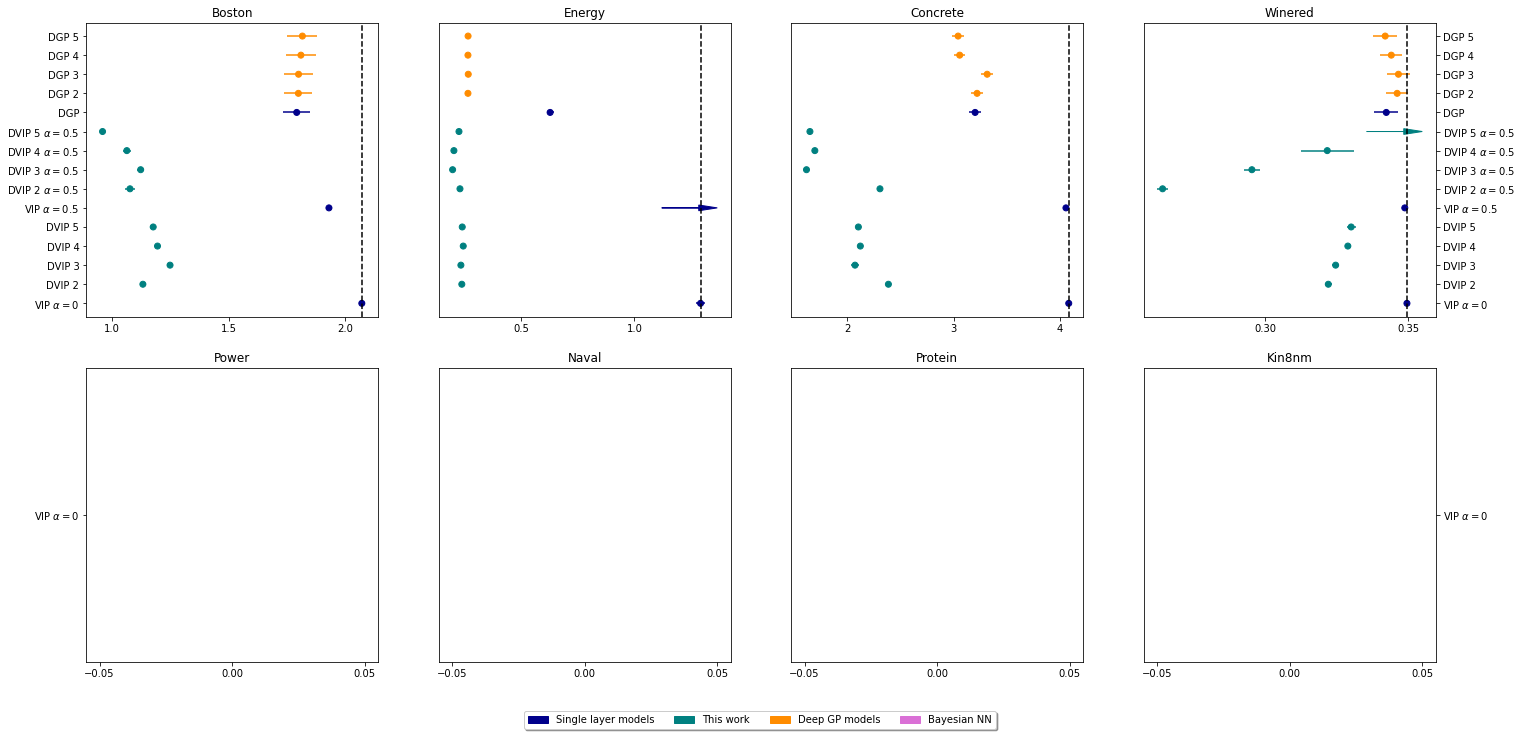

In [15]:
plot_datasets(dataset_names, model_names, colors, "CRPS", train_metrics = True)